In [568]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import json
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [569]:
import statsmodels.api as sm

In [570]:
beauty = pd.read_csv('wards_beauty_score.csv')

In [571]:
solo_living = pd.read_csv('wards_household_data.csv')

In [572]:
solo_living.head()

,Region code,Region name,County code,County name,Local authority code,Local authority name,Ward code,Ward name,Unnamed: 8,Persons,Persons.1,Persons.2,Unnamed: 12,Hectares,Persons per hectare,Unnamed: 15,Households,Persons per household
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All usual residents,Household residents,Communal establishment residents,NaN,Area,Population density,NaN,Households with at least one usual resident,Average household size
1,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007955,Annfield Plain,NaN,"7,774","7,717",57,NaN,799,9.7,NaN,"3,522",2.2
2,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007956,Aycliffe East,NaN,"6,280","6,234",46,NaN,"1,336",4.7,NaN,"2,787",2.2
3,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007957,Aycliffe North,NaN,"7,751","7,611",140,NaN,337,23,NaN,"3,271",2.3
4,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007958,Aycliffe West,NaN,"7,457","7,457",0,NaN,288,25.9,NaN,"3,335",2.2


In [573]:
len(solo_living)

8571

In [574]:
solo_living = solo_living.drop(solo_living.index[0])
solo_living.head()
solo_living['Persons per household'] = solo_living['Persons per household'].astype('float32')

In [575]:
islingtonWards = solo_living[solo_living['Local authority name'] == 'Islington']['Ward code']

In [650]:
list(islingtonWards)

['E05000366',
 'E05000367',
 'E05000368',
 'E05000369',
 'E05000370',
 'E05000371',
 'E05000372',
 'E05000373',
 'E05000374',
 'E05000375',
 'E05000376',
 'E05000377',
 'E05000378',
 'E05000379',
 'E05000380',
 'E05000381']

In [577]:
solo_living['Persons per household'].unique()

array([2.20000005, 2.29999995, 2.0999999 , 2.4000001 , 2.70000005,
       2.        , 1.89999998, 2.5       , 2.5999999 , 2.9000001 ,
       3.5999999 , 3.20000005, 2.79999995, 3.29999995, 1.70000005,
       1.79999995, 3.0999999 , 3.        , 3.70000005, 3.5       ,
       3.4000001 , 1.60000002, 1.5       , 1.29999995, 3.79999995])

In [578]:
household_size = solo_living[['Ward code','Persons per household']].dropna()

In [579]:
household_size

,Ward code,Persons per household
1,E05007955,2.2
2,E05007956,2.2
3,E05007957,2.3
4,E05007958,2.2
5,E05007959,2.2
...,...,...
8566,W05000279,2.3
8567,W05000280,2.1
8568,W05000281,2.2
8569,W05000912,2.4


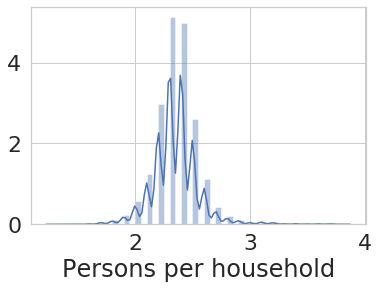

In [580]:
sns.distplot(solo_living['Persons per household'])

In [581]:
flickr = pd.read_csv('Ward_Flicker_nature_tags.csv')

In [582]:
flickr[:4]

,Unnamed: 0,GSS_CODE,tag_count,nature_tags,diversity_tags,food_tags,emissions_tags,industry_tags,tobacco_tags,cleaning_tags,...,animals_tags,nature_tags_score,diversity_tags_score,food_tags_score,emissions_tags_score,industry_tags_score,tobacco_tags_score,cleaning_tags_score,waste_tags_score,animals_tags_score
0,0,E05000026,32748,519,1,136,937,21,0,0,...,127,0.015848,0.000031,0.004153,0.028612,0.000641,0.000000,0.000000,0.000214,0.003878
1,1,E05000027,12155,1240,0,294,22,4,2,4,...,105,0.102016,0.000000,0.024188,0.001810,0.000329,0.000165,0.000329,0.000000,0.008638
2,2,E05000028,4706,174,0,10,22,0,0,0,...,43,0.036974,0.000000,0.002125,0.004675,0.000000,0.000000,0.000000,0.000000,0.009137
3,3,E05000029,6745,44,0,70,45,0,0,0,...,114,0.006523,0.000000,0.010378,0.006672,0.000000,0.000000,0.000000,0.000000,0.016901


In [583]:
beauty['ward_name'] = beauty['ward_name'].apply(lambda x: x.replace(' Ward',''))

In [584]:
len(beauty)

627

In [585]:
%store beauty

Stored 'beauty' (DataFrame)


In [586]:
beauty[:10]

,Unnamed: 0,ward_name,bscore
0,0,Chessington South,0.563107
1,1,Tolworth and Hook Rise,0.466667
2,2,Berrylands,0.741379
3,3,Alexandra,0.638554
4,4,Beverley,0.582278
5,5,Coombe Hill,0.503356
6,6,Chessington North and Hook,0.389610
7,7,Surbiton Hill,0.925373
8,8,Old Malden,0.675325
9,9,St. Mark's,0.745455


In [587]:
jsa = pd.read_csv('Claimant_Count_Model_2015.csv')
jsa.head()

,GSS_CODE,WDNAME,OACODE,All ages,All ages.1,All ages.2,Age 18-24,Age 25-44,Age 45-64,Age 18-24.1,Age 25-44.1,Age 45-64.1,Age 18-24.2,Age 25-44.2,Age 45-64.2
0,E05000026,Abbey,00ABFX,6724.0,4061.0,2663.0,612.0,4756.0,1356.0,319.0,2857.0,885.0,293.0,1899.0,471.0
1,E05000027,Alibon,00ABFY,4877.0,2559.0,2318.0,564.0,2587.0,1726.0,304.0,1336.0,919.0,260.0,1251.0,807.0
2,E05000028,Becontree,00ABFZ,6401.0,3439.0,2962.0,731.0,3734.0,1936.0,383.0,2001.0,1055.0,348.0,1733.0,881.0
3,E05000029,Chadwell Heath,00ABGA,4577.0,2414.0,2163.0,579.0,2291.0,1707.0,299.0,1220.0,895.0,280.0,1071.0,812.0
4,E05000030,Eastbrook,00ABGB,5259.0,2796.0,2463.0,793.0,2358.0,2108.0,430.0,1261.0,1105.0,363.0,1097.0,1003.0


In [588]:
len(jsa)

681

In [589]:
beauty_merged = pd.merge(jsa , beauty , left_on='WDNAME' , right_on='ward_name')

In [590]:
len(beauty_merged)

605

In [591]:
jsa_merged = pd.merge(beauty_merged , flickr , left_on='GSS_CODE' , right_on='GSS_CODE')

In [592]:
len(jsa_merged)

554

In [593]:
income = pd.read_csv('modelled-household-income-estimates-wards.csv', engine='python')
for column in income.columns: 
    income[column] =  income[column].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    income[column] =  income[column].apply(lambda x: x.replace(',',''))
merged_socio_1 = pd.merge(income,jsa_merged,left_on='Code' , right_on='GSS_CODE')
merged_socio = pd.merge(merged_socio_1,household_size,left_on='Code' , right_on='Ward code')
selected_socio = merged_socio[['GSS_CODE','Persons per household','All ages','Median 2012/13' , 'bscore' ,'nature_tags_score',
       'diversity_tags_score', 'food_tags_score', 'emissions_tags_score',
       'industry_tags_score', 'tobacco_tags_score', 'cleaning_tags_score',
       'waste_tags_score', 'animals_tags_score']]
selected_socio = selected_socio.rename(columns={'All ages':'All_jsa'})

In [594]:
len(merged_socio)

554

In [595]:
selected_socio.head()

,GSS_CODE,Persons per household,All_jsa,Median 2012/13,bscore,nature_tags_score,diversity_tags_score,food_tags_score,emissions_tags_score,industry_tags_score,tobacco_tags_score,cleaning_tags_score,waste_tags_score,animals_tags_score
0,E05000026,2.8,6724.0,33920,0.616279,0.015848,0.000031,0.004153,0.028612,0.000641,0.000000,0.000000,0.000214,0.003878
1,E05000027,2.6,4877.0,32470,0.319149,0.102016,0.000000,0.024188,0.001810,0.000329,0.000165,0.000329,0.000000,0.008638
2,E05000028,2.7,6401.0,33000,0.560606,0.036974,0.000000,0.002125,0.004675,0.000000,0.000000,0.000000,0.000000,0.009137
3,E05000029,2.5,4577.0,33920,0.390244,0.006523,0.000000,0.010378,0.006672,0.000000,0.000000,0.000000,0.000000,0.016901
4,E05000030,2.6,5259.0,37400,0.426230,0.013113,0.000000,0.000359,0.000760,0.000055,0.000000,0.000000,0.000000,0.011938


In [596]:
Ward_IMD = json.load(open('Ward_index_deprivation.json'))

ward = {'GSS_CODE': [] , 'IMD' : []}
for k in Ward_IMD:
    ward['GSS_CODE'].append(k)
    ward['IMD'].append(Ward_IMD[k])
wardDf = pd.DataFrame.from_dict(ward)

theData = pd.read_csv('Merged_all_disease_green_sat.csv')

In [597]:
third_places = pd.read_csv('ward_third_places_ordinance_survey.csv')

In [598]:
third_places.head()

,Unnamed: 0,GSS_CODE,third_places
0,0,E05000026,783
1,1,E05000027,244
2,2,E05000028,315
3,3,E05000029,339
4,4,E05000030,371


In [599]:
data_0 = pd.merge(third_places,wardDf,left_on='GSS_CODE' , right_on='GSS_CODE')

In [600]:
data_1 = pd.merge(theData,data_0,left_on='GSS_CODE' , right_on='GSS_CODE')

In [601]:
data_2 = pd.merge(data_1,selected_socio,left_on='GSS_CODE' , right_on='GSS_CODE')

In [602]:
TreeScore = pd.read_csv('Revised_tree_score.csv')

In [603]:
data = pd.merge(data_2,TreeScore,left_on='GSS_CODE' , right_on='borough_name')

In [604]:
data.to_csv('All_data_aggregated_ward_level.csv')

In [605]:
data['All_jsa'] = data['All_jsa']/data['population']
data['Sex_ratio'] = data['male']/data['female']

In [606]:
data['third_places'] = data['third_places']/data['population']

In [607]:
data.head()

,Unnamed: 0_x,green_score,GSS_CODE,WD17CD,GLUD_Area of Greenspace PCT,LCM_grass_pct,LCM_tree_pct,LCM_urban_pct,UA_Public Greenery PCT,UA_Forests PCT,...,industry_tags_score,tobacco_tags_score,cleaning_tags_score,waste_tags_score,animals_tags_score,Unnamed: 0,borough_name,TreeScore_norm,samples,Sex_ratio
0,0,8.91957,E05000420,E05000420,0.142967,0.000000,0.000000,1.000000,0.039482,0.0,...,0.000295,0.000045,0.000206,0.000063,0.000931,217,E05000420,0.068589,174,0.983525
1,1,41.70052,E05000571,E05000571,0.391747,0.095716,0.030845,0.734149,0.314715,0.0,...,0.000670,0.000000,0.000000,0.000134,0.002546,372,E05000571,0.075160,138,0.933078
2,2,18.26981,E05000570,E05000570,0.112290,0.048426,0.007533,0.898305,0.019456,0.0,...,0.000000,0.000000,0.000000,0.000000,0.001251,383,E05000570,0.097131,124,0.909381
3,3,27.56138,E05000572,E05000572,0.254884,0.136226,0.015136,0.828456,0.197242,0.0,...,0.000028,0.000000,0.000055,0.000139,0.027698,375,E05000572,0.068269,101,0.966677
4,4,41.44914,E05000620,E05000620,0.273367,0.033396,0.014513,0.754370,0.192175,0.0,...,0.007365,0.000015,0.000456,0.000202,0.005507,442,E05000620,0.058179,146,0.951631


In [608]:
list(data.columns)

['Unnamed: 0_x',
 'green_score',
 'GSS_CODE',
 'WD17CD',
 'GLUD_Area of Greenspace PCT',
 'LCM_grass_pct',
 'LCM_tree_pct',
 'LCM_urban_pct',
 'UA_Public Greenery PCT',
 'UA_Forests PCT',
 'StreetTrees_PCT',
 'Unnamed: 0.1',
 'borough_name_x',
 'poly',
 'area_m',
 'area_km',
 'gsview_point_list',
 'gsview_segnet_tags_dict',
 'gsview_tags',
 'total_gsview_pixels',
 'Tree',
 'TreeTotal',
 'TreeScore',
 'psoriasis_Prescriptions',
 'psoriasis_Prevalence',
 "Meniere's disease_Prescriptions",
 "Meniere's disease_Prevalence",
 "crohn's disease_Prescriptions",
 "crohn's disease_Prevalence",
 'gastroparesis_Prescriptions',
 'gastroparesis_Prevalence',
 'irritable bowel syndrome_Prescriptions',
 'irritable bowel syndrome_Prevalence',
 'parkinson_Prescriptions',
 'parkinson_Prevalence',
 'sleep apnea_Prescriptions',
 'sleep apnea_Prevalence',
 'interstitial cystitis_Prescriptions',
 'interstitial cystitis_Prevalence',
 'bipolar_Prescriptions',
 'bipolar_Prevalence',
 'hypothyroidism_Prescriptions

In [609]:
data['f_alcohol'] = data['f_wine'] + data['f_beer'] + data['f_spirits']

In [610]:
pearsonr(data['weight'],data['Persons per household'])

(0.4422961709874468, 2.942163835261278e-21)

In [611]:
pearsonr(data['weight'],data['depression_Prevalence'])

(-0.43497235613300644, 1.5399498338268846e-20)

In [612]:
pearsonr(data['Persons per household'],data['depression_Prevalence'])

(-0.31492776675359246, 5.5263967329940226e-11)

In [613]:
pearsonr(data['h_nutrients_calories_norm'],data['depression_Prevalence'])

(0.20727515008498618, 2.1288749533491612e-05)

In [614]:
pearsonr(data['Sex_ratio'],data['depression_Prevalence'])

(-0.32884930701767634, 6.759294955014159e-12)

In [615]:
pearsonr(data['avg_age'],data['depression_Prevalence'])

(0.25978951593168237, 8.217089794388148e-08)

In [616]:
pearsonr(data['weight'],data['Persons per household'])

(0.4422961709874468, 2.942163835261278e-21)

In [617]:
pearsonr(data['third_places'],data['depression_Prevalence'])

(-0.030730553865511746, 0.5329356259196422)

In [618]:
pearsonr(data['third_places'],data['TreeScore'])

(0.06642467502895308, 0.17735432483479122)

In [619]:
%store -r Ward_estimates

In [620]:
Ward_estimates.head()

,WardCode,Household
0,E05000026,0.231343
1,E05000027,0.189103
2,E05000028,0.230441
3,E05000029,0.183381
4,E05000030,0.201635


In [621]:
subset = data[['h_nutrients_calories_norm','GSS_CODE','depression_Prevalence','borough_name_y']].copy()
merged_solo_subset = pd.merge(Ward_estimates,subset , left_on='WardCode', right_on='GSS_CODE')
merged_solo_subset.head()

,WardCode,Household,h_nutrients_calories_norm,GSS_CODE,depression_Prevalence,borough_name_y
0,E05000026,0.231343,0.660005,E05000026,2.536093,E05000026
1,E05000027,0.189103,0.663760,E05000027,5.088617,E05000027
2,E05000028,0.230441,0.667451,E05000028,4.006256,E05000028
3,E05000029,0.183381,0.652409,E05000029,6.112272,E05000029
4,E05000030,0.201635,0.663478,E05000030,4.216100,E05000030


In [622]:
islington = merged_solo_subset[merged_solo_subset['WardCode'].isin(islingtonWards)].copy()

In [623]:
islington

,WardCode,Household,h_nutrients_calories_norm,GSS_CODE,depression_Prevalence,borough_name_y
239,E05000366,0.314698,0.685141,E05000366,6.819278,E05000366
240,E05000367,0.303258,0.689787,E05000367,6.782704,E05000367
241,E05000368,0.380482,0.692468,E05000368,5.831055,E05000368
242,E05000369,0.353793,0.686127,E05000369,7.861621,E05000369
243,E05000370,0.279847,0.687931,E05000370,9.673954,E05000370
244,E05000371,0.349655,0.679431,E05000371,7.305479,E05000371
245,E05000372,0.353728,0.693525,E05000372,8.466857,E05000372
246,E05000373,0.335225,0.688575,E05000373,7.708375,E05000373
247,E05000374,0.352217,0.686638,E05000374,5.487071,E05000374
248,E05000375,0.315037,0.683395,E05000375,6.543647,E05000375


In [624]:
np.median(islington['Household'])

0.33522458628841606

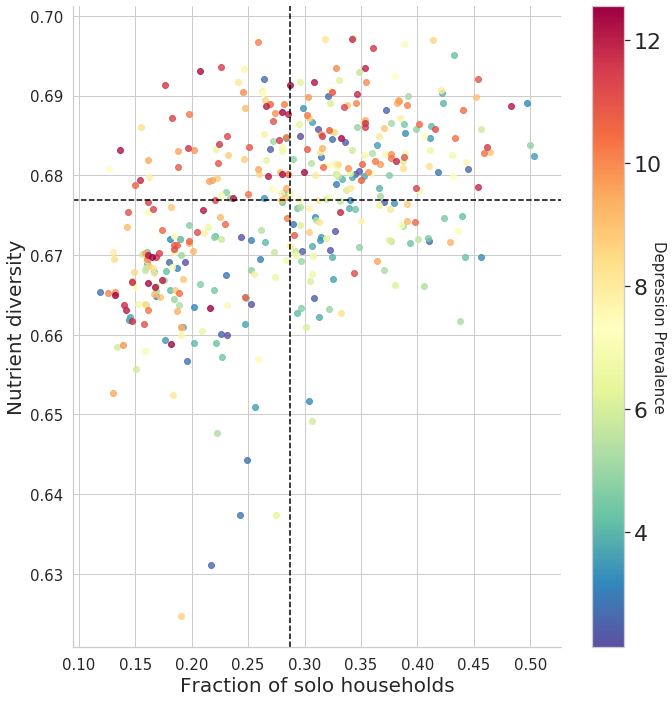

In [625]:
sns.set_style("whitegrid")
g= sns.lmplot( x='Household', y='h_nutrients_calories_norm', data=merged_solo_subset, fit_reg=False, hue='depression_Prevalence', legend=False, palette="Spectral_r",height=10)
ax = g.axes[0][0]

scalarmap = plt.cm.ScalarMappable(cmap='Spectral_r', norm=plt.Normalize(vmin=max(merged_solo_subset['depression_Prevalence']), vmax=min(merged_solo_subset['depression_Prevalence'])))
cbar = plt.colorbar(scalarmap)
cbar.set_label('Depression Prevalence', rotation=270, fontsize = 15)

ax.axhline(np.median(merged_solo_subset['h_nutrients_calories_norm']), ls='--',color='black')
ax.axvline(np.median(merged_solo_subset['Household']), ls='--',color='black')
ax.set_xlabel("Fraction of solo households",fontsize=20)
ax.set_ylabel("Nutrient diversity",fontsize=20)
ax.tick_params(labelsize=15)

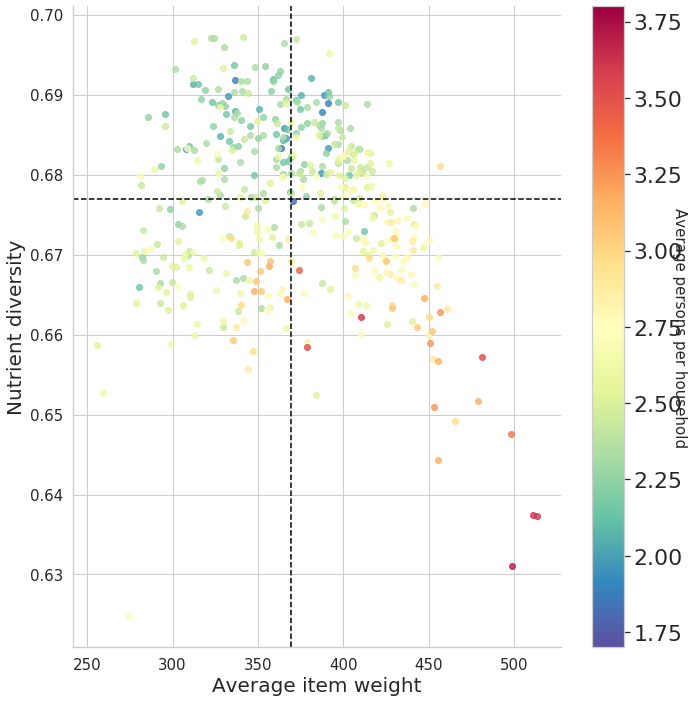

In [626]:
sns.set_style("whitegrid")
g= sns.lmplot( x='weight', y='h_nutrients_calories_norm', data=data, fit_reg=False, hue='Persons per household', legend=False, palette="Spectral_r",height=10)
ax = g.axes[0][0]

scalarmap = plt.cm.ScalarMappable(cmap='Spectral_r', norm=plt.Normalize(vmin=max(data['Persons per household']), vmax=min(data['Persons per household'])))
cbar = plt.colorbar(scalarmap)
cbar.set_label('Average persons per household', rotation=270, fontsize = 15)

ax.axhline(np.median(data['h_nutrients_calories_norm']), ls='--',color='black')
ax.axvline(np.median(data['weight']), ls='--',color='black')
ax.set_xlabel("Average item weight",fontsize=20)
ax.set_ylabel("Nutrient diversity",fontsize=20)
ax.tick_params(labelsize=15)


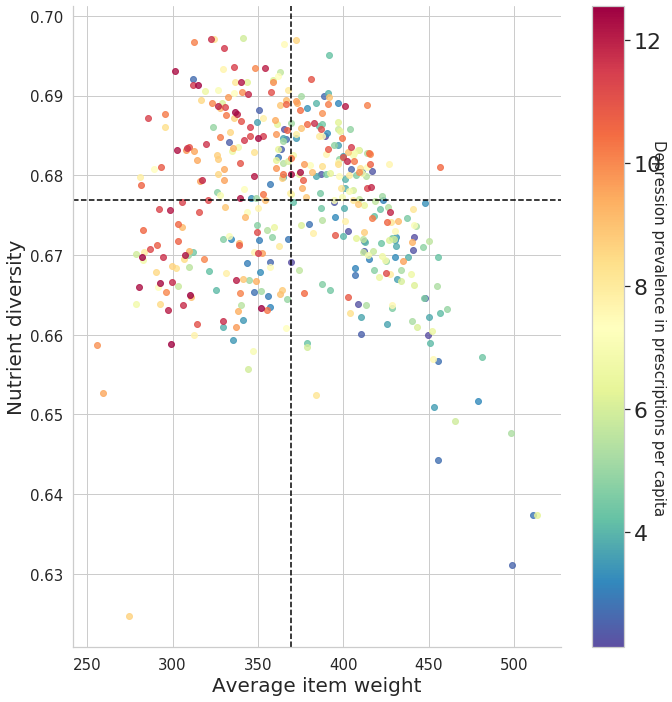

In [627]:
sns.set_style("whitegrid")
g = sns.lmplot( x='weight', y='h_nutrients_calories_norm', data=data, fit_reg=False, hue='depression_Prevalence', legend=False, palette="Spectral_r",height=10)
ax = g.axes[0][0]
scalarmap = plt.cm.ScalarMappable(cmap='Spectral_r', norm=plt.Normalize(vmin=max(data['depression_Prevalence']), vmax=min(data['depression_Prevalence'])))
cbar = plt.colorbar(scalarmap)
cbar.set_label('Depression prevalence in prescriptions per capita', rotation=270, fontsize = 15)
ax.axhline(np.median(data['h_nutrients_calories_norm']), ls='--',color='black')
ax.axvline(np.median(data['weight']), ls='--',color='black')
ax.set_xlabel("Average item weight",fontsize=20)
ax.set_ylabel("Nutrient diversity",fontsize=20)
ax.tick_params(labelsize=15)



In [628]:
data['quantile_Sex_ratio'] = pd.qcut(data['Sex_ratio'], q=4, labels =["1st" , "2nd" , "3rd", "4th"])
data['quantile_avg_age'] = pd.qcut(data['avg_age'], q=4 , labels = ["1st" , "2nd" , "3rd", "4th"])

In [629]:
data['quantile_Sex_ratio'].unique()

[3rd, 1st, 2nd, 4th]
Categories (4, object): [1st < 2nd < 3rd < 4th]

In [630]:
data.to_csv('SoloLiving_causal_ForAdam.csv')

In [639]:
socio_economic = ['avg_age', 'IMD','people_per_sq_km' ,'Sex_ratio','All_jsa','Median 2012/13','Persons per household']
# nutrient = ['transaction_days' , 'weight' ,'num_transactions']
nutrient  = [
 'h_items_norm',
 'h_items_weight_norm',
 'h_nutrients_calories_norm']
green = ['TreeScore_norm','GLUD_Area of Greenspace PCT','LCM_tree_pct','LCM_urban_pct','UA_Public Greenery PCT','StreetTrees_PCT']
Flickr = ['nature_tags_score','diversity_tags_score', 'food_tags_score', 'emissions_tags_score','industry_tags_score', 
          'tobacco_tags_score', 'cleaning_tags_score', 'waste_tags_score', 'animals_tags_score']
beauty = ['bscore']

X_public = ['UA_Public Greenery PCT']       
X_private = ['TreeScore_norm','StreetTrees_PCT']

control = ['LCM_urban_pct']

Y_green = ['GLUD_Area of Greenspace PCT']

X_dims_green = X_private + X_public + control

X_dims =  socio_economic + nutrient

# X_solo = nutrient + ['avg_age', 'IMD','people_per_sq_km' ,'Sex_ratio','Median 2012/13']
X_solo = nutrient
Y_solo = ['Persons per household']

X_dims_2 = socio_economic + nutrient + green +  Flickr + beauty

print(X_dims , X_dims_2)
Y_dims = ['Persons per household']
tree_dims =['TreeScore','GLUD_Area of Greenspace PCT','LCM_tree_pct','LCM_urban_pct','UA_Public Greenery PCT','StreetTrees_PCT']
min_max_scaler = preprocessing.MinMaxScaler() 
X_green_model = np.array(data[X_dims_green].values,dtype=np.float32)
Y_green_model = np.array(data[Y_green].values,dtype=np.float32)

X_green_model = min_max_scaler.fit_transform(X_green_model)
Y_green_model = min_max_scaler.fit_transform(Y_green_model)

X = np.array(data[X_dims].values,dtype=np.float32)
X_2= np.array(data[X_dims_2].values,dtype=np.float32)
Y = np.array(data[Y_dims].values,dtype=np.float32)

X_prime = np.array(data[tree_dims].values,dtype=np.float32)
X = min_max_scaler.fit_transform(X)
X2 = min_max_scaler.fit_transform(X_2)
Y = min_max_scaler.fit_transform(Y)

['avg_age', 'IMD', 'people_per_sq_km', 'Sex_ratio', 'All_jsa', 'Median 2012/13', 'Persons per household', 'h_items_norm', 'h_items_weight_norm', 'h_nutrients_calories_norm'] ['avg_age', 'IMD', 'people_per_sq_km', 'Sex_ratio', 'All_jsa', 'Median 2012/13', 'Persons per household', 'h_items_norm', 'h_items_weight_norm', 'h_nutrients_calories_norm', 'TreeScore_norm', 'GLUD_Area of Greenspace PCT', 'LCM_tree_pct', 'LCM_urban_pct', 'UA_Public Greenery PCT', 'StreetTrees_PCT', 'nature_tags_score', 'diversity_tags_score', 'food_tags_score', 'emissions_tags_score', 'industry_tags_score', 'tobacco_tags_score', 'cleaning_tags_score', 'waste_tags_score', 'animals_tags_score', 'bscore']


In [640]:
interaction_factors = [('weight','avg_age'),('weight','people_per_sq_km'),('weight','Sex_ratio'),('weight','Median 2012/13'),
                       ('h_nutrients_calories_norm','Median 2012/13'),
                       ('avg_age','IMD'),('avg_age','people_per_sq_km'),('avg_age','IMD'),('avg_age','Sex_ratio'),('avg_age','Median 2012/13'),
                       ('people_per_sq_km','IMD'),
                       ('people_per_sq_km','Sex_ratio')
                      ]

[Text(0, 0.5, 'h_items_norm'),
 Text(0, 1.5, 'h_items_weight_norm'),
 Text(0, 2.5, 'Nutrient Diversity')]

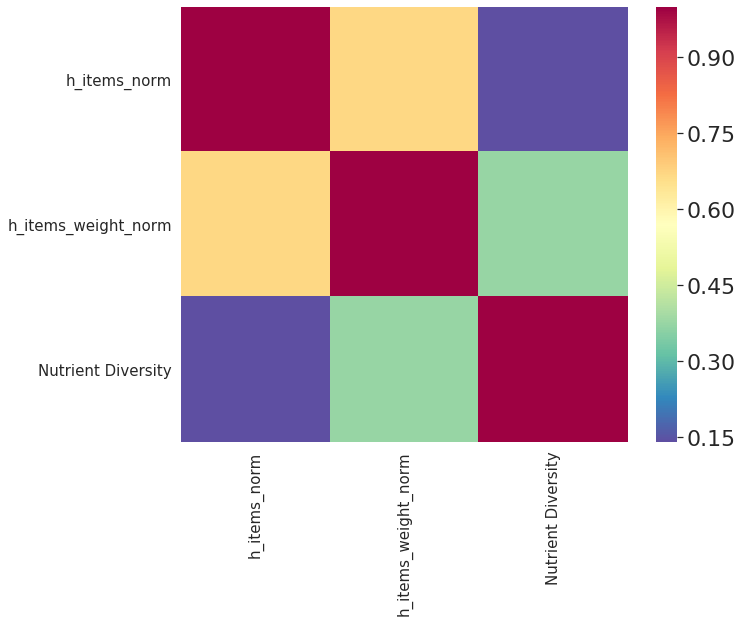

In [641]:
solo = data[X_solo].astype('float32', copy=True)
solo.rename(columns={'h_nutrients_calories_norm':'Nutrient Diversity',
                          'weight':'Average item weight',
                          'avg_age':'Average age' , 'people_per_sq_km':'Population density' , 'Median 2012/13':'Median Income'}, 
                 inplace=True)
fig, ax = plt.subplots(figsize=(10,8))         
corr = solo.corr(method='pearson')
sns.heatmap(corr, annot=False , ax=ax ,cmap='Spectral_r' )
ax.set_xticklabels(corr.columns, fontsize=15)
ax.set_yticklabels(corr.columns, fontsize=15)


In [642]:
print(X_solo)
Xframesolo = data[X_solo].astype('float32', copy=True)
# for factor in interaction_factors:
#     Xframesolo[factor[0] + '_' + factor[1]] = Xframesolo[factor[0]]* Xframesolo[factor[1]]
            
print(Xframesolo.columns)


['h_items_norm', 'h_items_weight_norm', 'h_nutrients_calories_norm']
Index(['h_items_norm', 'h_items_weight_norm', 'h_nutrients_calories_norm'], dtype='object')


In [643]:
# Xframesolo_2 = Xframesolo[['h_nutrients_calories_norm', 'weight']]
Xframesolo_2 = Xframesolo

In [644]:
# pearsonr(Xframesolo['weight'], Xframesolo['h_nutrients_calories_norm'])

In [645]:
y_plot = np.array(data[Y_dims].values,dtype=np.float32)
Ysolo = min_max_scaler.fit_transform(np.array(data[Y_dims].values,dtype=np.float32))
# Ysolo = np.array(data[Y_dims].values,dtype=np.float32)
Xframesolo = min_max_scaler.fit_transform(np.array(Xframesolo_2.values,dtype=np.float32))
# Xframesolo = np.array(Xframesolo_2.values,dtype=np.float32)
Xframesolo = sm.add_constant(Xframesolo)
model_solo = sm.OLS(Ysolo, Xframesolo).fit()
model_solo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     193.6
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           3.52e-78
Time:                        09:54:24   Log-Likelihood:                 358.64
No. Observations:                 414   AIC:                            -709.3
Df Residuals:                     410   BIC:                            -693.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9230      0.029     31.632      0.000       0.866       0.980
x1             0.3245      0.037      8.831      0.000       0.252       0.397
x2            -0.4821      0.045    -10.653      0.000      -0.571      -0.393
x3            -0.5849      0.037    -15.948      0.000      -0.657      -0.513
==============================================================================
Omnibus:                        5.073   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                6.754
Skew:                          -0.031   Prob(JB):                       0.0342
Kurtosis:                       3.623   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [646]:
Xframesolo.shape

(414, 4)

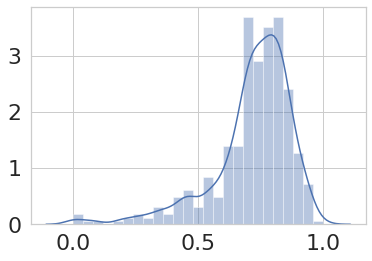

In [647]:
sns.distplot(Xframesolo[:,2])

In [648]:
Ysolo.shape

(414, 1)

/work/sagarj/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


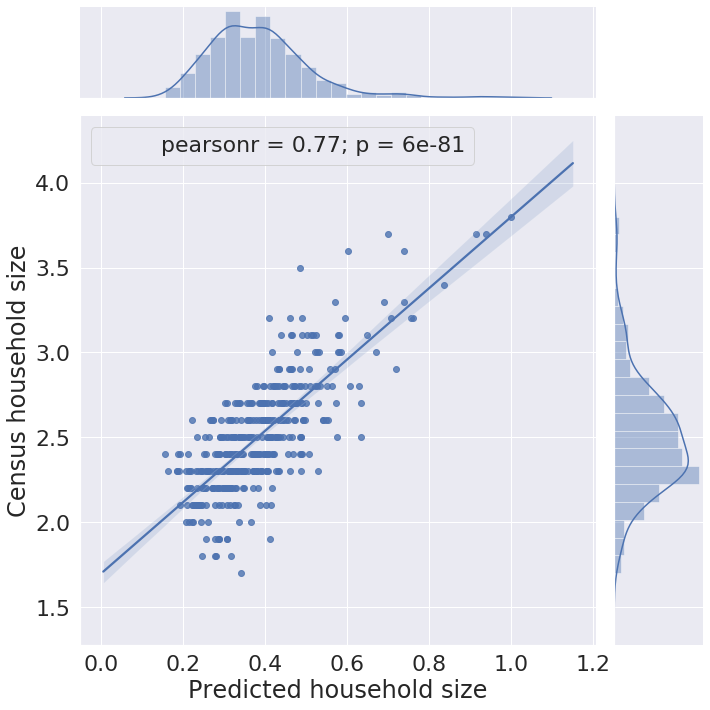

In [649]:
predictions_solo= model_solo.predict(Xframesolo)
sns.set(font_scale=2) 
ax = sns.jointplot(x=predictions_solo, y=y_plot[:,0], kind='regression',height=10);
plt.xlabel('Predicted household size')
plt.ylabel('Census household size')
ax.annotate(pearsonr)

In [408]:
features_to_normalize = ['h_nutrients_calories_norm', 'weight']
data[features_to_normalize] = data[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [409]:
data['Predicted_household'] = 4*(0.7283 - 0.6502*data['h_nutrients_calories_norm'] + 0.2582*data['weight'])

In [449]:
list(data.columns)

['Unnamed: 0_x',
 'green_score',
 'GSS_CODE',
 'WD17CD',
 'GLUD_Area of Greenspace PCT',
 'LCM_grass_pct',
 'LCM_tree_pct',
 'LCM_urban_pct',
 'UA_Public Greenery PCT',
 'UA_Forests PCT',
 'StreetTrees_PCT',
 'Unnamed: 0.1',
 'borough_name_x',
 'poly',
 'area_m',
 'area_km',
 'gsview_point_list',
 'gsview_segnet_tags_dict',
 'gsview_tags',
 'total_gsview_pixels',
 'Tree',
 'TreeTotal',
 'TreeScore',
 'psoriasis_Prescriptions',
 'psoriasis_Prevalence',
 "Meniere's disease_Prescriptions",
 "Meniere's disease_Prevalence",
 "crohn's disease_Prescriptions",
 "crohn's disease_Prevalence",
 'gastroparesis_Prescriptions',
 'gastroparesis_Prevalence',
 'irritable bowel syndrome_Prescriptions',
 'irritable bowel syndrome_Prevalence',
 'parkinson_Prescriptions',
 'parkinson_Prevalence',
 'sleep apnea_Prescriptions',
 'sleep apnea_Prevalence',
 'interstitial cystitis_Prescriptions',
 'interstitial cystitis_Prevalence',
 'bipolar_Prescriptions',
 'bipolar_Prevalence',
 'hypothyroidism_Prescriptions

In [450]:
Solo_predicted_df  =  data[['GSS_CODE','h_nutrients_calories_norm' ,'weight','Predicted_household','avg_age', 'IMD','people_per_sq_km' ,'Sex_ratio','All_jsa','Median 2012/13','Persons per household']].copy()

In [451]:
Solo_predicted_df.head()

,GSS_CODE,h_nutrients_calories_norm,weight,Predicted_household,avg_age,IMD,people_per_sq_km,Sex_ratio,All_jsa,Median 2012/13,Persons per household
0,E05000420,0.704583,0.717053,1.821292,33.195192,8.91957,14246.666667,0.983525,0.557674,32220,2.3
1,E05000571,0.648360,0.183695,1.416667,34.208704,41.70052,5918.048780,0.933078,0.530168,32330,2.5
2,E05000570,0.620116,0.100694,1.404398,40.219281,18.26981,6259.883721,0.909381,0.509148,37960,2.2
3,E05000572,0.626557,0.086853,1.373352,37.033810,27.56138,6597.948718,0.966677,0.510026,40610,2.5
4,E05000620,0.891669,0.452839,1.061839,35.017963,41.44914,6087.197232,0.951631,0.618008,39580,2.1


In [452]:
pearsonr(Solo_predicted_df['Predicted_household'] , Solo_predicted_df['Persons per household'])

(0.7448728087046563, 2.07269711719915e-74)

In [453]:
Solo_predicted_df.to_csv('Adam_updated_solo_living.csv')

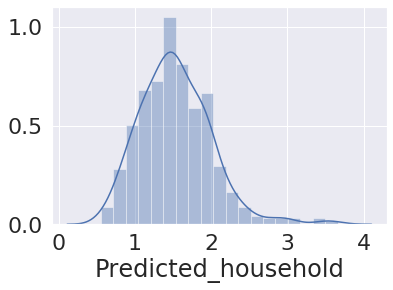

In [410]:
sns.distplot(data['Predicted_household'])

In [443]:
socio_economic = ['avg_age', 'IMD','people_per_sq_km' ,'Sex_ratio','Median 2012/13','Predicted_household']
Y_dep = ['depression_Prevalence']
Ydep = min_max_scaler.fit_transform(np.array(data[Y_dep].values,dtype=np.float32))
Xdep = min_max_scaler.fit_transform(np.array(data[socio_economic].values,dtype=np.float32))
Xdep = sm.add_constant(Xdep)
model_dep = sm.OLS(Ydep, Xdep).fit()
model_dep.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     18.98
Date:                Fri, 28 Feb 2020   Prob (F-statistic):           1.62e-19
Time:                        12:43:16   Log-Likelihood:                 268.95
No. Observations:                 414   AIC:                            -523.9
Df Residuals:                     407   BIC:                            -495.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4720      0.048      9.754      0.000       0.377       0.567
x1             0.1657      0.045      3.649      0.000       0.076       0.255
x2            -0.0499      0.052     -0.967      0.334      -0.151       0.051
x3             0.0709      0.066      1.081      0.281      -0.058       0.200
x4            -0.2668      0.060     -4.481      0.000      -0.384      -0.150
x5            -0.1962      0.082     -2.389      0.017      -0.358      -0.035
x6            -0.2997      0.059     -5.110      0.000      -0.415      -0.184
==============================================================================
Omnibus:                       25.763   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.162
Skew:                           0.516   Prob(JB):                     6.29e-08
Kurtosis:                       3.925   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

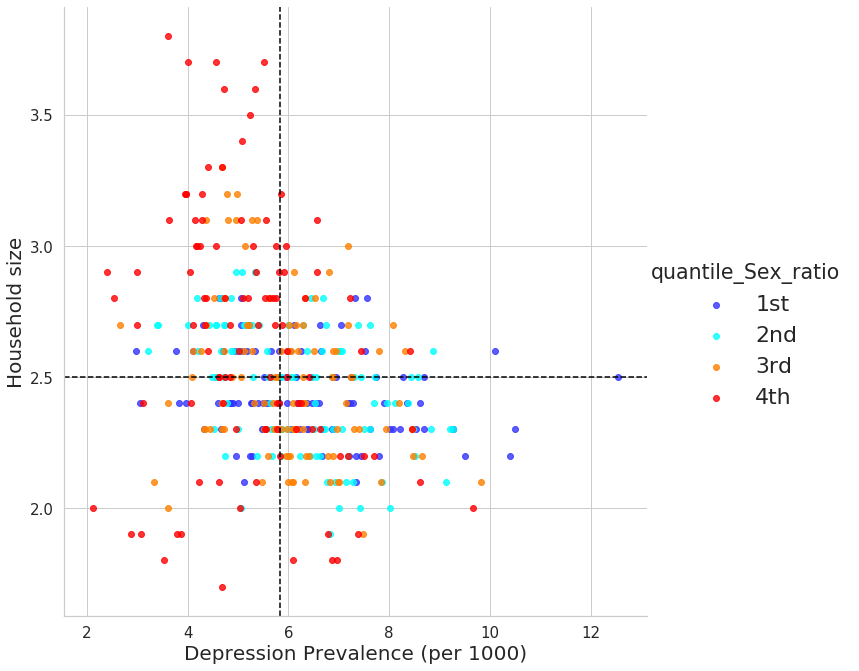

In [442]:
sns.set_style("whitegrid")
flatui = ["#3333FF", "#00FFFF", "#FF8000" , "#FF0000"]
sns.set_palette(flatui)
g= sns.lmplot( x='depression_Prevalence', y='Persons per household', data=data, fit_reg=False, hue='quantile_Sex_ratio', legend=True,height=10)
ax = g.axes[0][0]

# scalarmap = plt.cm.ScalarMappable(cmap='Set1', norm=plt.Normalize(vmin=max(data['quantile_Sex_ratio']), vmax=min(data['quantile_Sex_ratio'])))
# cbar = plt.colorbar(scalarmap)
# cbar.set_label('Sex Ratio Quantile', rotation=270, fontsize = 15)

ax.axhline(np.median(data['Persons per household']), ls='--',color='black')
ax.axvline(np.median(data['depression_Prevalence']), ls='--',color='black')
ax.set_xlabel("Depression Prevalence (per 1000)",fontsize=20)
ax.set_ylabel("Household size",fontsize=20)
ax.tick_params(labelsize=15)

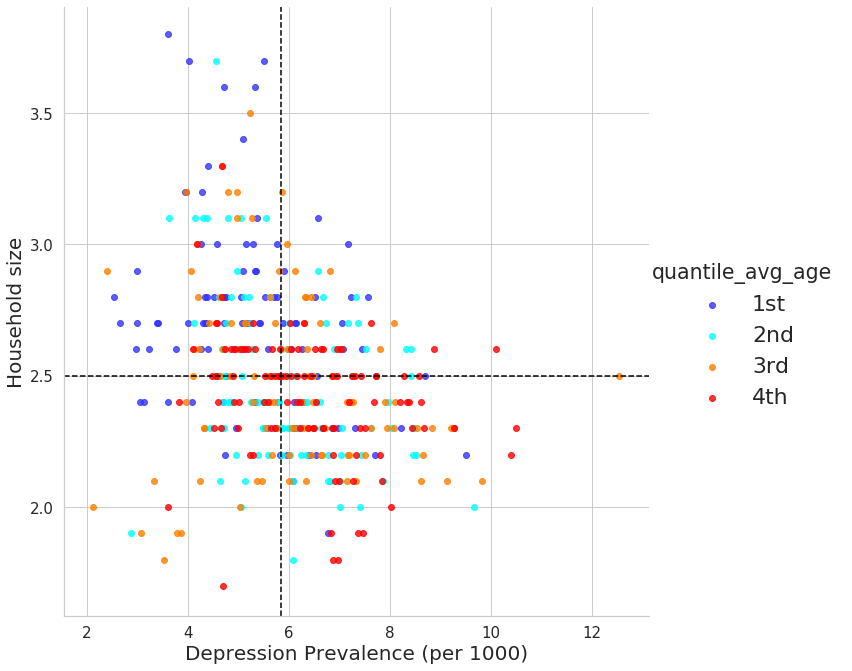

In [439]:
sns.set_style("whitegrid")
flatui = ["#3333FF", "#00FFFF", "#FF8000" , "#FF0000"]
sns.set_palette(flatui)
g= sns.lmplot( x='depression_Prevalence', y='Persons per household', data=data, fit_reg=False, hue='quantile_avg_age', legend=True ,height=10)
ax = g.axes[0][0]

# scalarmap = plt.cm.ScalarMappable(cmap='Spectral_r', norm=plt.Normalize(vmin=max(data['IMD']), vmax=min(data['avg_age'])))
# cbar = plt.colorbar(scalarmap)
# cbar.set_label('IMD', rotation=270, fontsize = 15)

ax.axhline(np.median(data['Persons per household']), ls='--',color='black')
ax.axvline(np.median(data['depression_Prevalence']), ls='--',color='black')
ax.set_xlabel("Depression Prevalence (per 1000)",fontsize=20)
ax.set_ylabel("Household size",fontsize=20)
ax.tick_params(labelsize=15)

In [386]:
X_green_model = sm.add_constant(X_green_model)

In [277]:
print(X_dims_green)

['TreeScore_norm', 'StreetTrees_PCT', 'UA_Public Greenery PCT', 'LCM_urban_pct']


In [278]:
X = sm.add_constant(X)
X2 = sm.add_constant(X2)

In [279]:
X.shape

(414, 10)

In [280]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [281]:
model_2 = sm.OLS(Y, X2).fit()
predictions_2 = model_2.predict(X2)

In [282]:
model_green = sm.OLS(Y_green_model, X_green_model).fit()
predictions_green = model_green.predict(X_green_model)

In [283]:
model_green.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     281.6
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          4.87e-116
Time:                        16:24:09   Log-Likelihood:                 344.84
No. Observations:                 414   AIC:                            -679.7
Df Residuals:                     409   BIC:                            -659.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7133      0.036     19.618      0.000       0.642       0.785
x1             0.1662      0.033      4.988      0.000       0.101       0.232
x2             0.1323      0.071      1.870      0.062      -0.007       0.271
x3             0.1337      0.033      4.047      0.000       0.069       0.199
x4            -0.6809      0.030    -22.974      0.000      -0.739      -0.623
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.029
Skew:                          -1.090   Prob(JB):                     9.33e-57
Kurtosis:                       6.194   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.686e+29
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:24:09   Log-Likelihood:                 13604.
No. Observations:                 414   AIC:                        -2.719e+04
Df Residuals:                     404   BIC:                        -2.715e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.327e-16   8.47e-16     -0.983      0.326    -2.5e-15    8.32e-16
x1         -1.804e-16   4.88e-16     -0.370      0.712   -1.14e-15    7.78e-16
x2         -6.384e-16    5.5e-16     -1.161      0.246   -1.72e-15    4.43e-16
x3          7.494e-16   7.13e-16      1.051      0.294   -6.52e-16    2.15e-15
x4          2.637e-16   6.19e-16      0.426      0.670   -9.53e-16    1.48e-15
x5          5.551e-17   5.67e-16      0.098      0.922   -1.06e-15    1.17e-15
x6          -7.91e-16   8.63e-16     -0.917      0.360   -2.49e-15    9.05e-16
x7             1.0000   6.51e-16   1.54e+15      0.000       1.000       1.000
x8         -8.327e-17   7.14e-16     -0.117      0.907   -1.49e-15    1.32e-15
x9          6.939e-18   4.61e-16      0.015      0.988   -8.99e-16    9.13e-16
==============================================================================
Omnibus:                        1.405   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                1.380
Skew:                          -0.058   Prob(JB):                        0.502
Kurtosis:                       2.742   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [285]:
X_dims_2

['avg_age',
 'IMD',
 'people_per_sq_km',
 'Sex_ratio',
 'All_jsa',
 'Median 2012/13',
 'Persons per household',
 'h_nutrients_calories_norm',
 'weight',
 'TreeScore_norm',
 'GLUD_Area of Greenspace PCT',
 'LCM_tree_pct',
 'LCM_urban_pct',
 'UA_Public Greenery PCT',
 'StreetTrees_PCT',
 'nature_tags_score',
 'diversity_tags_score',
 'food_tags_score',
 'emissions_tags_score',
 'industry_tags_score',
 'tobacco_tags_score',
 'cleaning_tags_score',
 'waste_tags_score',
 'animals_tags_score',
 'bscore']

In [286]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.309e+30
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:24:10   Log-Likelihood:                 14210.
No. Observations:                 414   AIC:                        -2.837e+04
Df Residuals:                     388   BIC:                        -2.826e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.11e-16   2.79e-16      0.398      0.691   -4.38e-16     6.6e-16
x1         -5.274e-16   1.29e-16     -4.078      0.000   -7.82e-16   -2.73e-16
x2         -1.388e-16   2.54e-16     -0.546      0.585   -6.39e-16    3.61e-16
x3           1.11e-16   1.82e-16      0.610      0.542   -2.47e-16    4.69e-16
x4          4.441e-16   1.55e-16      2.869      0.004     1.4e-16    7.48e-16
x5         -8.327e-17   1.39e-16     -0.597      0.551   -3.57e-16    1.91e-16
x6         -5.274e-16   2.25e-16     -2.347      0.019   -9.69e-16   -8.57e-17
x7             1.0000   1.59e-16    6.3e+15      0.000       1.000       1.000
x8          2.082e-16   1.77e-16      1.179      0.239   -1.39e-16    5.55e-16
x9          3.539e-16   1.12e-16      3.146      0.002    1.33e-16    5.75e-16
x10        -1.388e-16   1.44e-16     -0.967      0.334   -4.21e-16    1.43e-16
x11         -1.11e-16   2.27e-16     -0.490      0.624   -5.56e-16    3.34e-16
x12         3.192e-16   1.43e-16      2.234      0.026    3.83e-17       6e-16
x13        -3.678e-16   1.46e-16     -2.513      0.012   -6.55e-16      -8e-17
x14         2.168e-17   1.09e-16      0.199      0.842   -1.92e-16    2.36e-16
x15         6.939e-17    2.4e-16      0.289      0.773   -4.02e-16    5.41e-16
x16        -2.776e-17   1.68e-16     -0.165      0.869   -3.58e-16    3.02e-16
x17        -1.249e-16    2.2e-16     -0.569      0.570   -5.57e-16    3.07e-16
x18        -2.776e-17    1.6e-16     -0.173      0.863   -3.43e-16    2.87e-16
x19        -6.939e-18   1.28e-16     -0.054      0.957   -2.58e-16    2.44e-16
x20         2.498e-16   1.43e-16      1.744      0.082   -3.19e-17    5.31e-16
x21        -1.527e-16   1.58e-16     -0.967      0.334   -4.63e-16    1.58e-16
x22        -5.551e-16   2.66e-16     -2.084      0.038   -1.08e-15   -3.15e-17
x23         -2.22e-16   2.66e-16     -0.834      0.405   -7.45e-16    3.01e-16
x24         3.227e-16   1.44e-16      2.234      0.026    3.87e-17    6.07e-16
x25         1.665e-16   1.06e-16      1.568      0.118   -4.23e-17    3.75e-16
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   0.593
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.158
Skew:                           0.035   Prob(JB):                        0.924
Kurtosis:                       2.935   Cond. No.                         48.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [287]:
np.median(data['TreeScore_norm'])

0.07659832779271514

In [288]:
data['Green_residuals'] =  np.array([predictions_green[k] - Y_green_model[k] for k in range(len(predictions_green))] , dtype = np.float32)

In [289]:
data['green_residual_quart'] = pd.qcut(data['Green_residuals'], q=4, precision=0)

In [290]:
data['green_residual_quart'].unique()

[(-0.07, -0.008], (-0.4, -0.07], (0.05, 0.5], (-0.008, 0.05]]
Categories (4, interval[float64]): [(-0.4, -0.07] < (-0.07, -0.008] < (-0.008, 0.05] < (0.05, 0.5]]

In [291]:
data['green_residual_quart'].cat.codes

0      1
1      0
2      3
3      1
4      2
      ..
409    1
410    0
411    1
412    1
413    3
Length: 414, dtype: int8

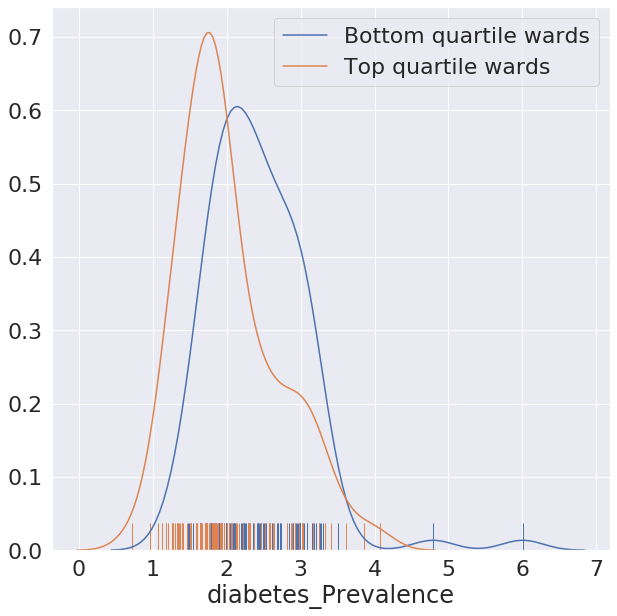

In [292]:

bottom_quartile = data[data['green_residual_quart'].cat.codes == 0]
top_quartile = data[data['green_residual_quart'].cat.codes == 3] 
f, ax = plt.subplots(figsize=(10, 10))
sns.distplot(bottom_quartile['diabetes_Prevalence'],hist=False, rug=True,label="Bottom quartile wards",ax=ax)
sns.distplot(top_quartile['diabetes_Prevalence'],hist=False, rug=True,label="Top quartile wards",ax=ax)

In [293]:
bottom_quartile

,Unnamed: 0_x,green_score,GSS_CODE,WD17CD,GLUD_Area of Greenspace PCT,LCM_grass_pct,LCM_tree_pct,LCM_urban_pct,UA_Public Greenery PCT,UA_Forests PCT,...,cleaning_tags_score,waste_tags_score,animals_tags_score,Unnamed: 0,borough_name,TreeScore_norm,samples,Sex_ratio,Green_residuals,green_residual_quart
1,1,41.700520,E05000571,E05000571,0.391747,0.095716,0.030845,0.734149,0.314715,0.000000,...,0.000000,0.000134,0.002546,372,E05000571,0.075160,138,0.933078,-0.087396,"(-0.4, -0.07]"
5,5,29.981620,E05000627,E05000627,0.397799,0.130412,0.018213,0.829897,0.304956,0.000000,...,0.000039,0.000157,0.006282,426,E05000627,0.096178,217,1.089117,-0.132903,"(-0.4, -0.07]"
6,6,17.689080,E05000046,E05000046,0.320848,0.046790,0.014695,0.925754,0.103816,0.000000,...,0.000011,0.000091,0.000699,191,E05000046,0.086465,117,0.998440,-0.172227,"(-0.4, -0.07]"
7,7,38.250920,E05000214,E05000214,0.414144,0.054701,0.206838,0.733713,0.333710,0.000000,...,0.000060,0.000060,0.004207,284,E05000214,0.086173,234,0.959162,-0.097910,"(-0.4, -0.07]"
9,9,27.673880,E05000216,E05000216,0.341743,0.075073,0.077988,0.832847,0.245057,0.000000,...,0.000000,0.000074,0.010802,279,E05000216,0.080935,195,0.952822,-0.107448,"(-0.4, -0.07]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,398,42.565330,E05000414,E05000414,0.355092,0.238031,0.019305,0.729344,0.088869,0.000000,...,0.000081,0.000000,0.002717,1,E05000414,0.056350,191,0.970898,-0.106171,"(-0.4, -0.07]"
396,405,4.922967,E05000640,E05000640,0.250468,0.019284,0.001377,0.966942,0.156482,0.000000,...,0.000110,0.000158,0.001229,496,E05000640,0.084563,52,0.979533,-0.113468,"(-0.4, -0.07]"
401,411,4.903682,E05000648,E05000648,0.189089,0.000000,0.008641,0.981567,0.023542,0.000000,...,0.000104,0.000139,0.001438,494,E05000648,0.083604,82,0.964075,-0.071215,"(-0.4, -0.07]"
406,416,55.166580,E05000253,E05000253,0.478367,0.189284,0.018338,0.766863,0.296646,0.000000,...,0.000067,0.000140,0.001172,455,E05000253,0.064937,130,0.925911,-0.234402,"(-0.4, -0.07]"


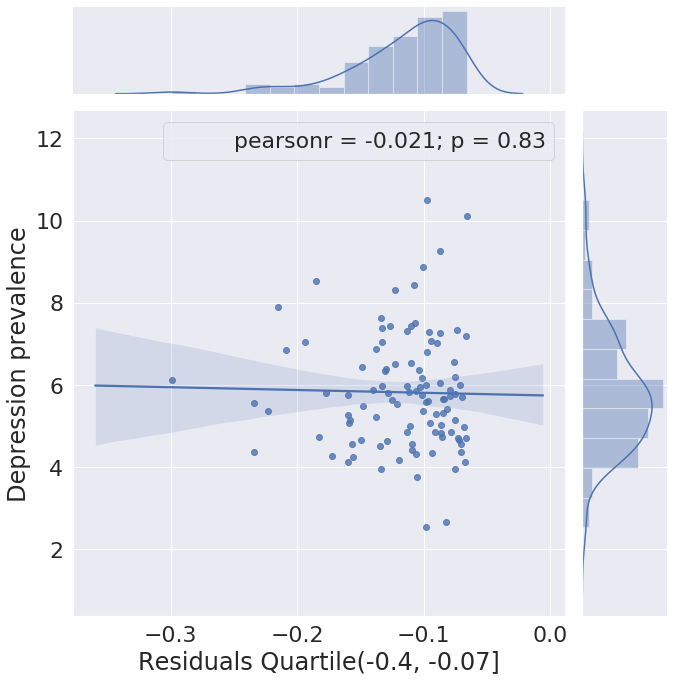

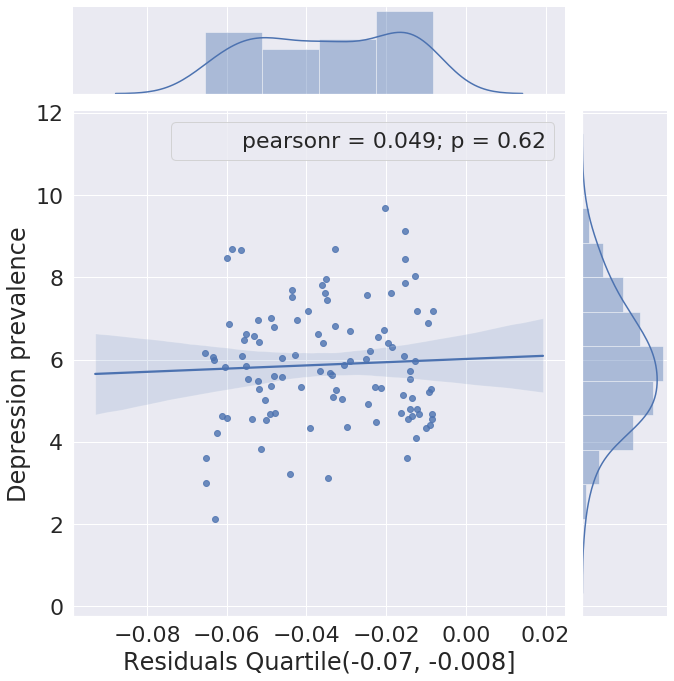

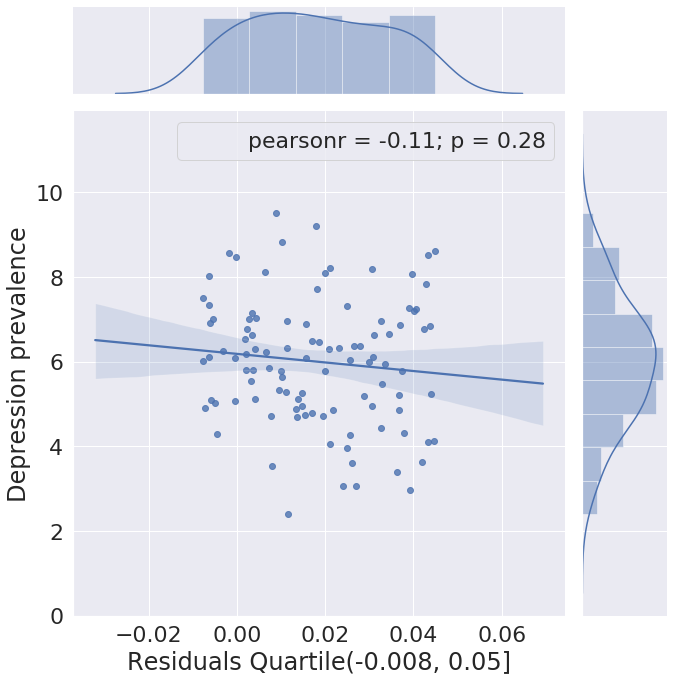

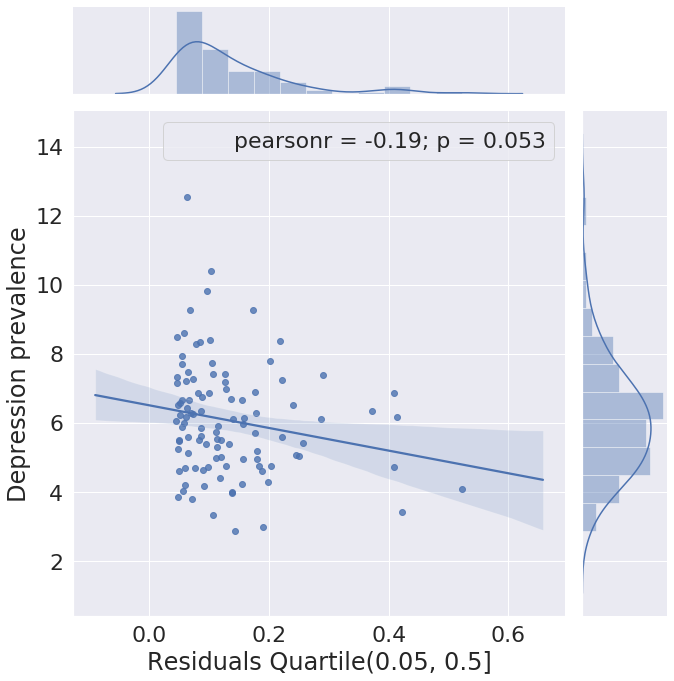

In [294]:
for name , group in data.groupby('green_residual_quart'):
    sns.set(font_scale=2) 
    ax = sns.jointplot(x=group['Green_residuals'], y=group['depression_Prevalence'], kind='regression',height=10);
    plt.xlabel( 'Residuals Quartile' + str(name))
    plt.ylabel('Depression prevalence')
    ax.annotate(pearsonr)

In [295]:
np.corrcoef(predictions_2,Y[:,0])

array([[1., 1.],
       [1., 1.]])

In [296]:
np.corrcoef(predictions_green,Y_green_model[:,0])

array([[1.        , 0.85652833],
       [0.85652833, 1.        ]])

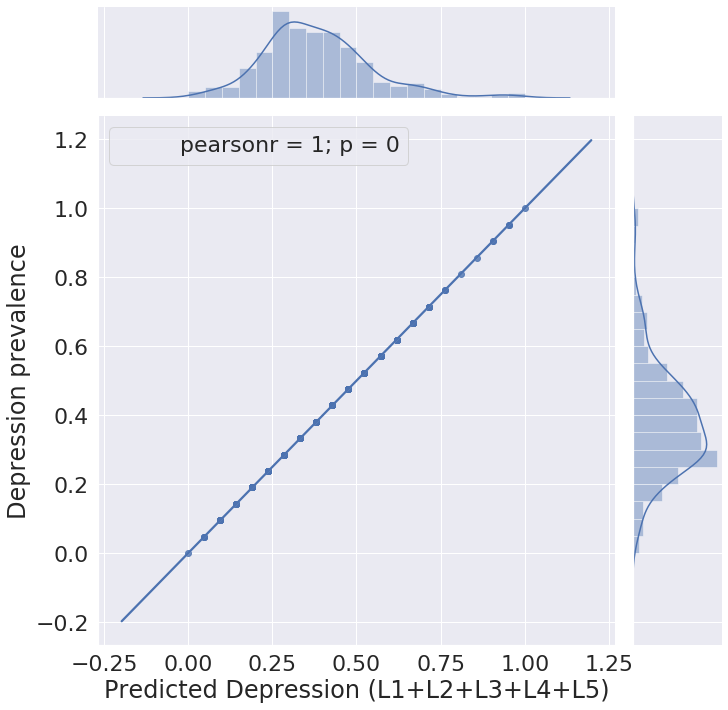

In [297]:
sns.set(font_scale=2) 
ax = sns.jointplot(x=predictions_2, y=Y[:,0], kind='regression',height=10);
plt.xlabel('Predicted Depression (L1+L2+L3+L4+L5)')
plt.ylabel('Depression prevalence')
ax.annotate(pearsonr)

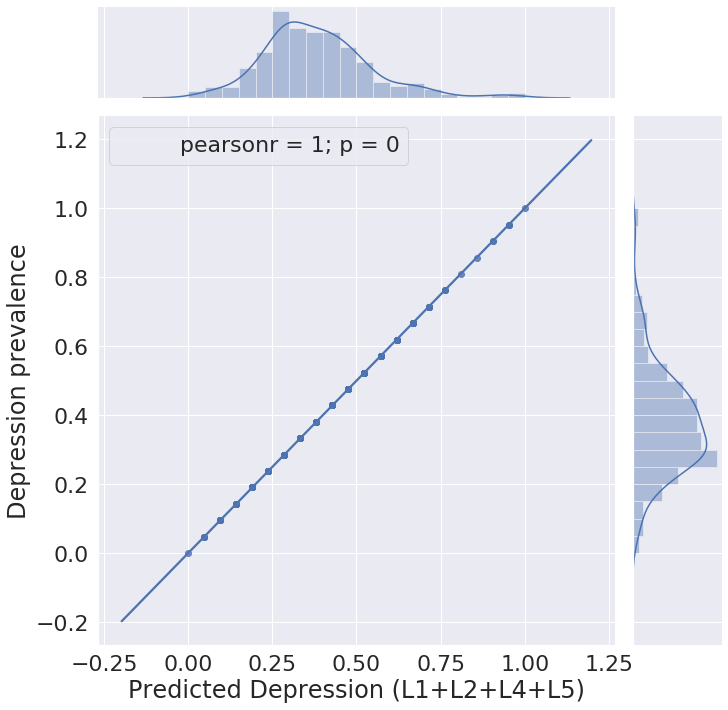

In [298]:
sns.set(font_scale=2) 
ax = sns.jointplot(x=predictions, y=Y[:,0], kind='regression',height=10);
plt.xlabel('Predicted Depression (L1+L2+L4+L5)')
plt.ylabel('Depression prevalence')
ax.annotate(pearsonr)

In [299]:
residuals_with_green = np.array([predictions_2[k] - Y[k,0] for k in range(len(predictions_2))] , dtype = np.float32)

In [300]:
residuals_without_green = np.array([predictions[k] - Y[k,0] for k in range(len(predictions))] , dtype = np.float32)

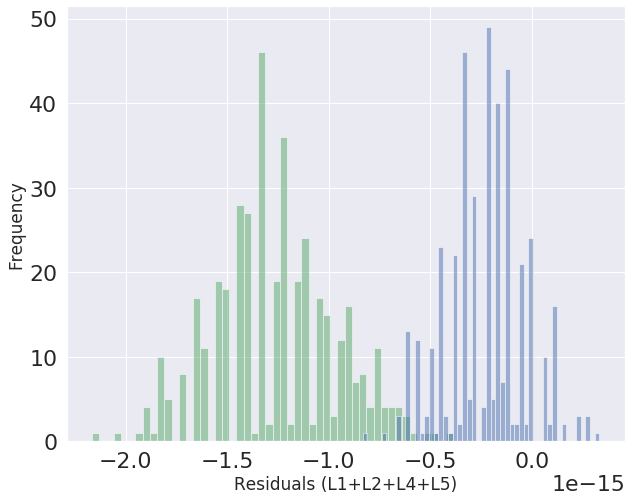

In [301]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.ylabel('Frequency',fontsize=17)
plt.xlabel('Residuals (L1+L2+L4+L5)',fontsize=17)
n1 , bins1 , patches1 = plt.hist(residuals_without_green, 50, facecolor='g', alpha=0.5)
n2 , bins2 , patches2 = plt.hist(residuals_with_green, 50, facecolor='b', alpha=0.5)
# n2 , bins2 , patches2 = plt.hist(Y[:,0], 50, facecolor='r', alpha=0.75)
plt.show()

In [302]:
results_df = {'GSS_CODE':[] , 'Normalized_depression' :[] ,'Predict_L1':[] , 'Predict_L2':[] , 'Residual_L1':[]}
for index, row in data.iterrows():
    results_df['GSS_CODE'].append(row['GSS_CODE'])
    results_df['Normalized_depression'].append(Y[index][0])
    results_df['Predict_L1'].append(predictions[index])
    results_df['Predict_L2'].append(predictions_2[index])
    results_df['Residual_L1'].append(residuals_without_green[index])
results = pd.DataFrame.from_dict(results_df)
results.head()

,GSS_CODE,Normalized_depression,Predict_L1,Predict_L2,Residual_L1
0,E05000420,0.285714,0.285714,0.285714,-7.771561e-16
1,E05000571,0.380952,0.380952,0.380952,-1.332268e-15
2,E05000570,0.238095,0.238095,0.238095,-1.249001e-15
3,E05000572,0.380952,0.380952,0.380952,-1.332268e-15
4,E05000620,0.190476,0.190476,0.190476,-1.360023e-15


In [303]:
green = np.array(X_prime[:,0],dtype = np.float32)

In [304]:
green.shape, residuals_with_green.shape

((414,), (414,))

In [305]:
r = np.corrcoef(residuals, green)
print(r )

NameError: name 'residuals' is not defined

In [ ]:
sns.set(font_scale=2) 
ax = sns.jointplot(x=green, y=residuals, kind='regression',height=10);
plt.xlabel('GLUD_Area of Greenspace PCT')
plt.ylabel('Residuals of the linear model')
ax.annotate(pearsonr)

In [ ]:
from sklearn import linear_model

In [310]:
df = data[X_dims_2]

In [311]:
df.head()

,avg_age,IMD,people_per_sq_km,Sex_ratio,All_jsa,Median 2012/13,Persons per household,h_nutrients_calories_norm,weight,TreeScore_norm,...,nature_tags_score,diversity_tags_score,food_tags_score,emissions_tags_score,industry_tags_score,tobacco_tags_score,cleaning_tags_score,waste_tags_score,animals_tags_score,bscore
0,33.195192,8.91957,14246.666667,0.983525,0.557674,32220,2.3,0.675817,440.669488,0.068589,...,0.002488,0.00000,0.011257,0.002506,0.000295,0.000045,0.000206,0.000063,0.000931,0.617978
1,34.208704,41.70052,5918.048780,0.933078,0.530168,32330,2.5,0.671743,303.275663,0.075160,...,0.011122,0.00000,0.005494,0.003484,0.000670,0.000000,0.000000,0.000134,0.002546,0.697674
2,40.219281,18.26981,6259.883721,0.909381,0.509148,37960,2.2,0.669696,281.894402,0.097131,...,0.017603,0.00000,0.005585,0.007640,0.000000,0.000000,0.000000,0.000000,0.001251,0.872727
3,37.033810,27.56138,6597.948718,0.966677,0.510026,40610,2.5,0.670163,278.329061,0.068269,...,0.009760,0.00000,0.005490,0.010148,0.000028,0.000000,0.000055,0.000139,0.027698,0.500000
4,35.017963,41.44914,6087.197232,0.951631,0.618008,39580,2.1,0.689372,372.607669,0.058179,...,0.015287,0.00001,0.001863,0.002836,0.007365,0.000015,0.000456,0.000202,0.005507,0.474820


In [312]:
len(df)

414

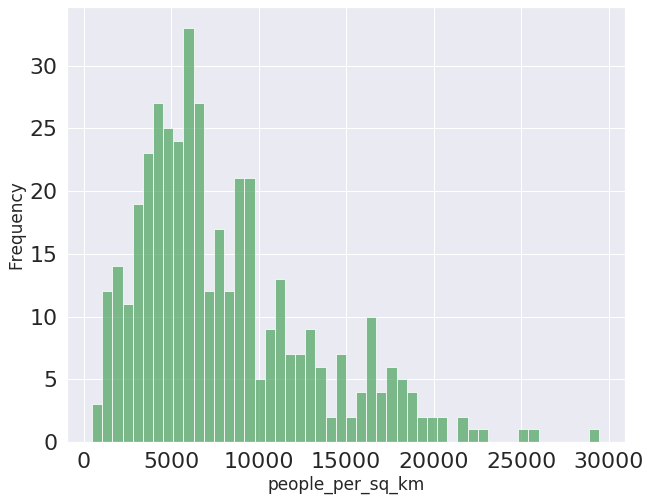

In [313]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.ylabel('Frequency',fontsize=17)
plt.xlabel('people_per_sq_km',fontsize=17)
n, bins, patches = plt.hist(df['people_per_sq_km'].values, 50, facecolor='g', alpha=0.75)
plt.show()

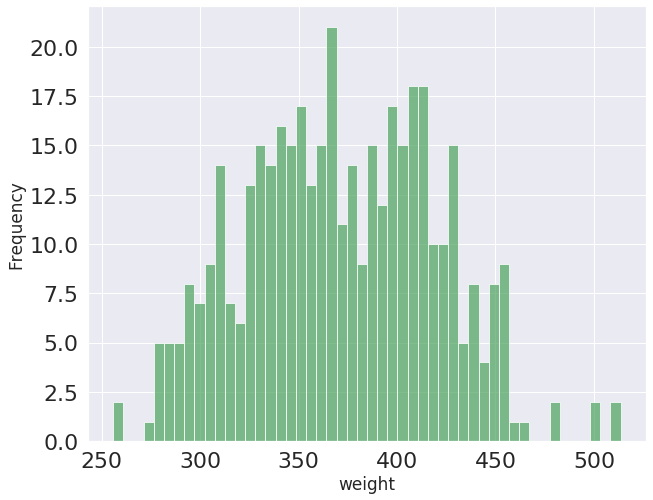

In [314]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.ylabel('Frequency',fontsize=17)
plt.xlabel('weight',fontsize=17)
n, bins, patches = plt.hist(df['weight'].values, 50, facecolor='g', alpha=0.75)
plt.show()

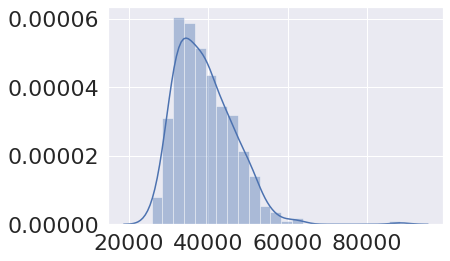

In [315]:
sns.distplot(np.array(df['Median 2012/13'].values , dtype=np.float32))

In [316]:
import statsmodels.api as sm
X_dims =  ['GLUD_Area of Greenspace PCT']
Y_dims = ['TreePixelDensity']


X = np.array(data[X_dims].values,dtype=np.float32)
Y = np.array(data[Y_dims].values,dtype=np.float32)
min_max_scaler = preprocessing.MinMaxScaler() #StandardScaler() #MinMaxScaler()
X = min_max_scaler.fit_transform(X)
Y = min_max_scaler.fit_transform(Y)
X = sm.add_constant(X)

KeyError: "None of [Index(['TreePixelDensity'], dtype='object')] are in the [columns]"

In [317]:
wards= data[['GSS_CODE','LCM_tree_pct','GLUD_Area of Greenspace PCT','TreePixelDensity']]

KeyError: "['TreePixelDensity'] not in index"

In [318]:
wards

NameError: name 'wards' is not defined

In [319]:
model_green = sm.OLS(Y, X).fit()
predictions_GSV_sat = model_green.predict(X)

In [320]:
model_green.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.666
Model:                            OLS   Adj. R-squared (uncentered):              0.665
Method:                 Least Squares   F-statistic:                              822.7
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                   2.47e-100
Time:                        16:24:45   Log-Likelihood:                          3.3903
No. Observations:                 414   AIC:                                     -4.781
Df Residuals:                     413   BIC:                                    -0.7548
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0457      0.036     28.683      0.000       0.974       1.117
==============================================================================
Omnibus:                       18.908   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.017
Skew:                           0.200   Prob(JB):                     1.24e-09
Kurtosis:                       4.489   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [321]:
np

<module 'numpy' from '/work/sagarj/miniconda3/lib/python3.7/site-packages/numpy/__init__.py'>

In [ ]:
Y.shape

In [ ]:

sns.set(font_scale=2) 
ax = sns.jointplot(x=predictions_GSV_sat, y=Y[:,0], kind='regression',height=10);
plt.xlabel('Predicted GSV green index from Sat')
plt.ylabel('Actual GSV green index')
ax.annotate(pearsonr)


In [ ]:
residuals_sat = np.array([predictions_GSV_sat[k] - Y[k,0] for k in range(len(predictions_GSV_sat))] , dtype = np.float32)

In [ ]:
wards['residuals'] = residuals_sat

In [ ]:
wards['predicted'] = predictions_GSV_sat

In [ ]:
wards['actual_scaled'] = (wards['TreePixelDensity']-df['TreePixelDensity'].min())/(df['TreePixelDensity'].max()-df['TreePixelDensity'].min())

In [ ]:
wards

In [ ]:
sns.distplot(residuals_sat)

In [ ]:
wards['residual_quart'] = pd.qcut(wards['residuals'], q=4, precision=0)

In [ ]:
wards['residual_quart'].unique()

In [ ]:
for name , group in wards.groupby('residual_quart'):
    sns.set(font_scale=2) 
    ax = sns.jointplot(x=group['actual_scaled'], y=group['predicted'], kind='regression',height=10);
    plt.xlabel('Predicted GSV green index from Sat: Quartile' + str(name))
    plt.ylabel('Actual GSV green index')
    ax.annotate(pearsonr)


In [ ]:
import geopandas as gpd

In [ ]:
wards_shape = gpd.read_file('../Data/Geo_Data/geo/london_wards.shp')

In [ ]:
wards_shape.head()

In [ ]:
wards_with_data = pd.merge(wards_shape , wards , left_on='CODE', right_on = 'GSS_CODE')

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('Wards Sorted by quartiles of residuals', fontdict={'fontsize': '25', 'fontweight' : '5'})
scalarmap = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=3))
# empty array for the data range
scalarmap._A = []
# add the colorbar to the figure
cbar = fig.colorbar(scalarmap)
wards_with_data.plot(ax=ax,column='residual_quart', cmap='Greens', linewidth=0.8)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('GSV green score by wards', fontdict={'fontsize': '25', 'fontweight' : '5'})
scalarmap = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=wards_with_data['TreePixelDensity'].min(), vmax=wards_with_data['TreePixelDensity'].max()))
# empty array for the data range
scalarmap._A = []
# add the colorbar to the figure
cbar = fig.colorbar(scalarmap)
wards_with_data.plot(ax=ax,column='TreePixelDensity', cmap='Greens', linewidth=0.8)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('LCM_tree_pct by wards', fontdict={'fontsize': '25', 'fontweight' : '5'})
scalarmap = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=wards_with_data['LCM_tree_pct'].min(), vmax=wards_with_data['LCM_tree_pct'].max()))
# empty array for the data range
scalarmap._A = []
# add the colorbar to the figure
cbar = fig.colorbar(scalarmap)
wards_with_data.plot(ax=ax,column='LCM_tree_pct', cmap='Greens', linewidth=0.8)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.axis('off')
ax.set_title('GLUD_Area of Greenspace PCT by wards', fontdict={'fontsize': '25', 'fontweight' : '5'})
scalarmap = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=wards_with_data['GLUD_Area of Greenspace PCT'].min(), vmax=wards_with_data['GLUD_Area of Greenspace PCT'].max()))
# empty array for the data range
scalarmap._A = []
# add the colorbar to the figure
cbar = fig.colorbar(scalarmap)
wards_with_data.plot(ax=ax,column='GLUD_Area of Greenspace PCT', cmap='Greens', linewidth=0.8)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
wards_shape.plot(ax=ax)